### **Introduction to Machine Learning: Exploring a Dataset**

#### Objective:
The goal of this homework is to familiarize yourself with the steps involved in a typical machine learning project: **data loading, exploration, cleaning, and basic visualization**. You'll work with a real-world dataset to understand its structure, identify patterns, and prepare it for future machine learning tasks.

---

#### Dataset:
Use the **Titanic Dataset**, a classic dataset available on [Kaggle](https://www.kaggle.com/c/titanic/data) or directly from the `seaborn` library (`sns.load_dataset('titanic')`). This dataset includes information about passengers on the Titanic, such as their demographics, ticket class, and survival status.

---

#### Steps to Complete:

1. **Understand the Dataset**
   - Load the dataset using `pandas` or `seaborn`.
   - Display the first few rows of the dataset.
   - Check the dataset’s structure: number of rows, columns, and data types.
   - Explore the features (columns): What does each column represent? Which ones are numerical, categorical, or mixed?

2. **Summary Statistics**
   - Calculate basic statistics (mean, median, mode, etc.) for numerical columns.
   - Count unique values in categorical columns (e.g., `Sex`, `Embarked`).
   - Identify any relationships between features, e.g., using `groupby` or pivot tables.

3. **Missing Data Analysis**
   - Check for missing values in the dataset.
   - Identify which features have the most missing values.
   - Suggest strategies to handle missing data (e.g., drop rows/columns, impute values).

4. **Data Visualization**
   - Create visualizations to understand the data better:
     - A histogram or box plot of **Age** to analyze its distribution.
     - A bar chart of **Sex** to show the male/female ratio.
     - A pie chart or bar plot showing the distribution of **Survived** (target variable).
     - Compare survival rates based on **Pclass**, **Sex**, or **Embarked** using grouped bar plots or heatmaps.

5. **Data Cleaning**
   - Perform basic data cleaning:
     - Remove duplicate rows (if any).
     - Fill missing values for selected features (e.g., fill `Age` with the median).
     - Encode categorical variables (e.g., convert `Sex` to 0/1).
   - Discuss how your cleaning steps could affect machine learning models.

6. **Basic Insights**
   - Answer exploratory questions based on the dataset, such as:
     - What percentage of passengers survived?
     - Did passengers in higher ticket classes (Pclass) have a higher survival rate?
     - Did age or gender influence survival?

---

#### Bonus Challenges (Optional):

1. **Feature Engineering**
   - Create new features from the existing ones, such as:
     - Family size (`SibSp + Parch`).
     - A binary feature for whether a passenger was traveling alone.
   - Discuss how these features might help in future machine learning tasks.

2. **Advanced Visualizations**
   - Use pair plots (`sns.pairplot`) to explore relationships between numerical variables.
   - Create a correlation heatmap for numerical features.

3. **Mini Predictive Task**
   - Identify potential target variables (e.g., `Survived`) and discuss what features might be useful for predicting them.
   - Create a simple decision rule (not a model) to predict survival based on your observations, such as:
     - “If `Pclass == 1` and `Sex == female`, then `Survived = 1`, else `Survived = 0`.”

---

#### Deliverables:
- A Python script or Jupyter Notebook containing:
  - Data loading, exploration, and cleaning steps.
  - Visualizations with clear labels and titles.
  - Answers to the exploratory questions.
  - Suggestions for handling missing data and feature engineering.

---

#### Useful Hints:
- Use libraries like `pandas` for data manipulation and `matplotlib`/`seaborn` for visualization.
- Save your cleaned dataset for use in future lessons when you apply machine learning algorithms.

In [2]:
import pandas as pd

df = pd.read_csv('data/titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(df['Sex'].value_counts())
print(df['Embarked'].value_counts())

print("\nSurvival rate by Pclass:\n", df.groupby('Pclass')['Survived'].mean())
print("\nSurvival rate by Sex:\n", df.groupby('Sex')['Survived'].mean())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Survival rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [5]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

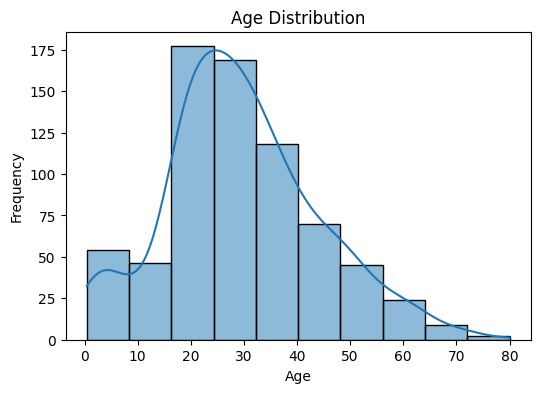

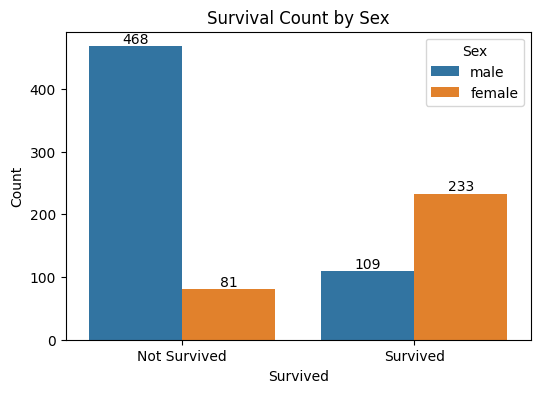

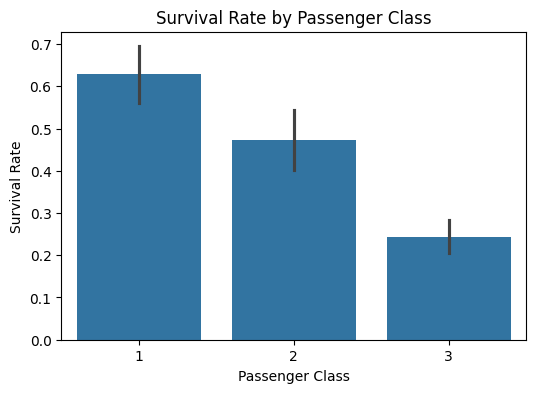

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# figure 1
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# figure 2
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Survived', data=df, hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Count by Sex')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel('Count')
plt.show()

# figure 3
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [33]:
# Drop duplicates
df = df.drop_duplicates(df.drop('PassengerId', axis=1))

# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encoding categorical variables
# df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [37]:
# Survival Analysis
survival_rate = df['Survived'].mean() * 100
print(f"Overall survival rate: {survival_rate:.2f}%")

# Survival rate by gender
male_survival_rate = df[df['Sex_male'] == 1]['Survived'].mean() * 100
female_survival_rate = df[df['Sex_male'] == 0]['Survived'].mean() * 100
print(f"\nMale survival rate: {male_survival_rate:.2f}%")
print(f"Female survival rate: {female_survival_rate:.2f}%")

# Survival rate by class
class_survival_rate = df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rate by class:")
print(class_survival_rate)


Overall survival rate: 38.38%

Male survival rate: 18.89%
Female survival rate: 74.20%

Survival rate by class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [38]:
# Create family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Binarize FamilySize
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

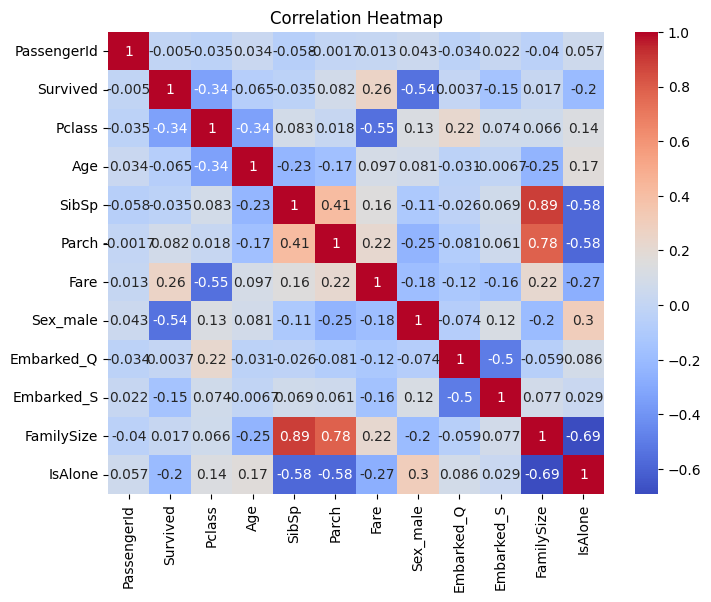

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [41]:
def simple_rule(row):
    if row['Pclass'] == 1 and row['Sex_male'] == 0:
        return 1
    else:
        return 0

df['Prediction'] = df.apply(simple_rule, axis=1)

# Check accuracy of the rule
accuracy = (df['Prediction'] == df['Survived']).mean()
print(f"Accuracy of simple rule: {accuracy:.2f}")


Accuracy of simple rule: 0.71


In [43]:
df.to_csv('data/titanic_cleaned.csv', index=True)